In [1]:
import os
import math
import time
import random
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tqdm.notebook import tqdm

## Let's load the data files for pdg = 11, pdg = 13 and pdg = 211

In [2]:
# root_directory
data_dir = os.path.join('..', '..', '..', 'data')

def get_hit_dfs(pdg, data_dir):
    """ Returns the `hit_dfs` dictionary that maps a simulation type to its dataframes. """

    # get the respective datasets locations
    root_dirs = {
        'ideal':
            os.path.join(data_dir, 'pdg{}'.format(pdg), 'pdg{}-n25-0.5to10GeV-0.5eta'.format(pdg)),
        'mat':
            os.path.join(data_dir, 'pdg{}'.format(pdg),
                         'pdg{}-n25-0.5to10GeV-0.5eta-with-material-effects'.format(pdg)),
        'odd-bfield':
            os.path.join(data_dir, 'pdg{}'.format(pdg),
                         'pdg{}-n25-0.5to10GeV-0.5eta-non-homogenous-magnetic-field'.format(pdg)),
        'mat-odd-bfield':
            os.path.join(data_dir, 'pdg{}'.format(pdg),
                         'pdg{}-n25-0.5to10GeV-0.5eta-with-material-effects-non-' \
                         'homogenous-magnetic-field'.format(pdg))
    }

    # read the hits files and dataset
    hit_files = {
        _type: sorted([file for file in os.listdir(root_dir) if file.endswith("-hits.csv")])
        for _type, root_dir in root_dirs.items()
    }
    hit_dfs = {
        _type: [pd.read_csv(os.path.join(root_dirs[_type], file), dtype={'particle_id':str, 'geometry_id': str})
                for file in files]
        for _type, files in hit_files.items()
    }
    
    return hit_dfs

pdg11_hit_dfs = get_hit_dfs(11, data_dir)
pdg13_hit_dfs = get_hit_dfs(13, data_dir)
pdg211_hit_dfs = get_hit_dfs(211, data_dir)

## Let's compute the total counts of particles that have a specific number of hits in an event

In [3]:
def get_counts(hit_dfs):
    simulations = hit_dfs.keys()
    hits_per_simul = {simul: {} for simul in simulations}

    count_min = float('inf')
    count_max = float('-inf')

    for simul in simulations:
        for df in hit_dfs[simul]:
            unique_particles = set(df['particle_id'])
            for pid in unique_particles:
                count = df['particle_id'].value_counts()[pid]
                hits_per_simul[simul][count] = hits_per_simul[simul].get(count, 0) + 1
                count_min = min(count, count_min)
                count_max = max(count, count_max)

    return hits_per_simul, count_min, count_max

In [4]:
pdg11_hits_per_simul, pdg11_count_min, pdg11_count_max = get_counts(pdg11_hit_dfs)
pdg13_hits_per_simul, pdg13_count_min, pdg13_count_max = get_counts(pdg13_hit_dfs)
pdg211_hits_per_simul, pdg211_count_min, pdg211_count_max = get_counts(pdg211_hit_dfs)

In [5]:
def plot_counts_of_hits(hits_per_simul, count_min, count_max, pdg):
    """ Plots the number of particles vs number of hits per 1 event. """

    def get_vals(xs, d):
        """ Returns a list with the y-values of a bar plot. """
        return [d.get(x, 0) for x in xs]
    
    fig, ax = plt.subplots(1, 1, figsize=(20, 12))

    xticks = np.arange(count_min, count_max + 1e-1, step=1)
    bar_width = 0.7
    b = bar_width / 4

    ideal_vals = get_vals(xticks, hits_per_simul['ideal'])
    mat_vals = get_vals(xticks, hits_per_simul['mat'])
    odd_bfield_vals = get_vals(xticks, hits_per_simul['odd-bfield'])
    mat_odd_bfield_vals = get_vals(xticks, hits_per_simul['mat-odd-bfield'])

    ax.bar(xticks - 3 * (bar_width / 8), ideal_vals, color='forestgreen', label='ideal', width=b)
    ax.bar(xticks - (bar_width / 8), mat_vals, color='navy', label='mat', width=b)
    ax.bar(xticks + (bar_width / 8), odd_bfield_vals, color='crimson', label='odd-bfield', width=b)
    ax.bar(xticks + 3 * (bar_width / 8), mat_odd_bfield_vals, color='black', label='mat-odd-bfield', width=b)

    ax.set_xticks(xticks)
    ax.set_xlabel('Number of hits in 1 event', fontsize=14)
    ax.set_ylabel('Count of particles with those number of hits in 1 event\n', fontsize=14)
    ax.set_title('Count of particles with specific number of hits vs Number of hits of a ' \
                 'particle for 1 event for pdg = {}'.format(pdg), fontsize=14)
    ax.legend()

    plt.show()

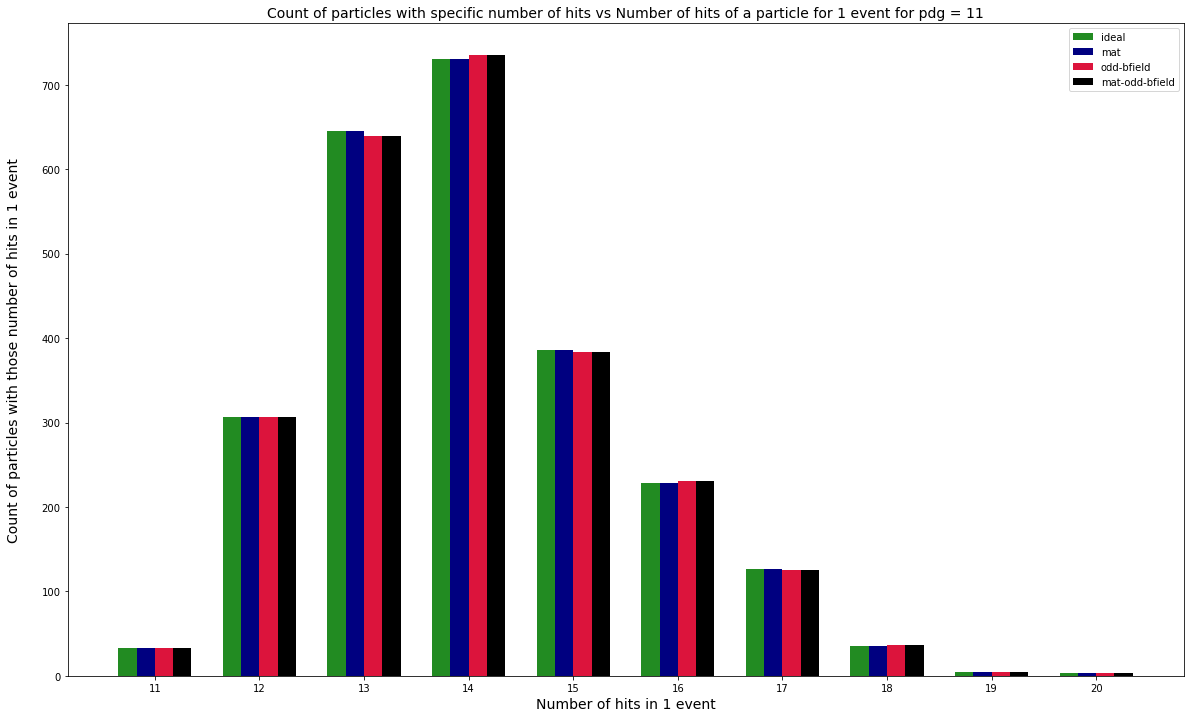

In [6]:
plot_counts_of_hits(pdg11_hits_per_simul, pdg11_count_min, pdg11_count_max, 11)

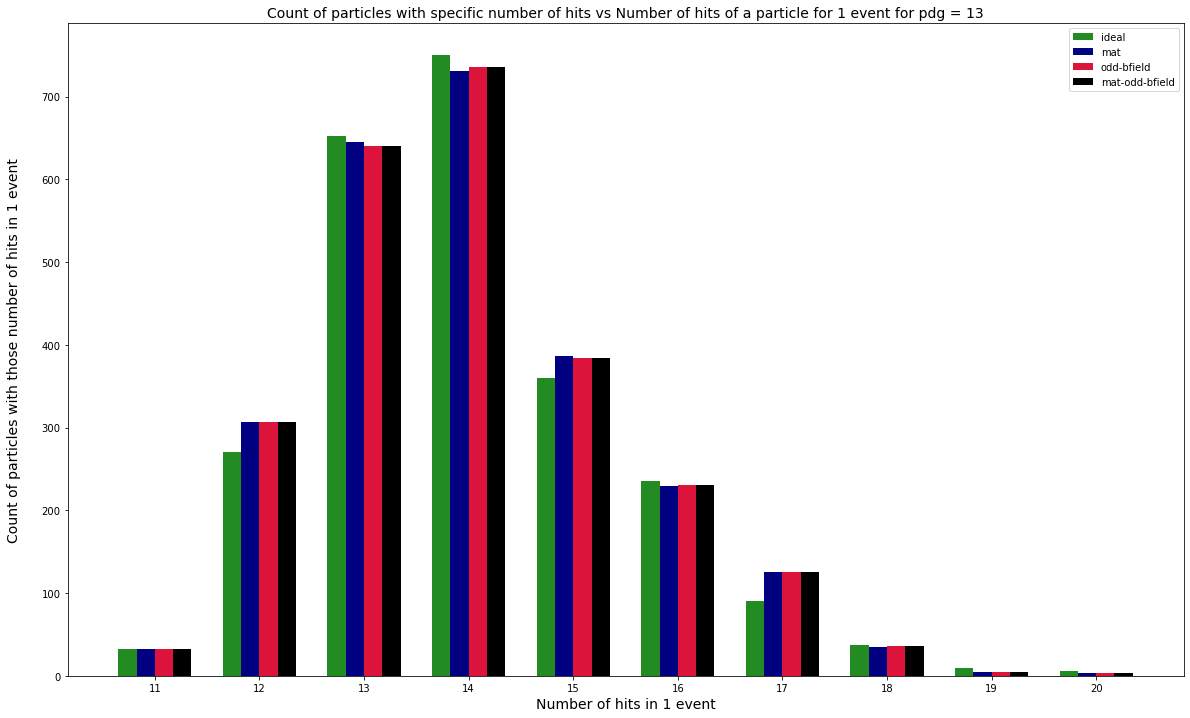

In [7]:
plot_counts_of_hits(pdg13_hits_per_simul, pdg13_count_min, pdg13_count_max, 13)

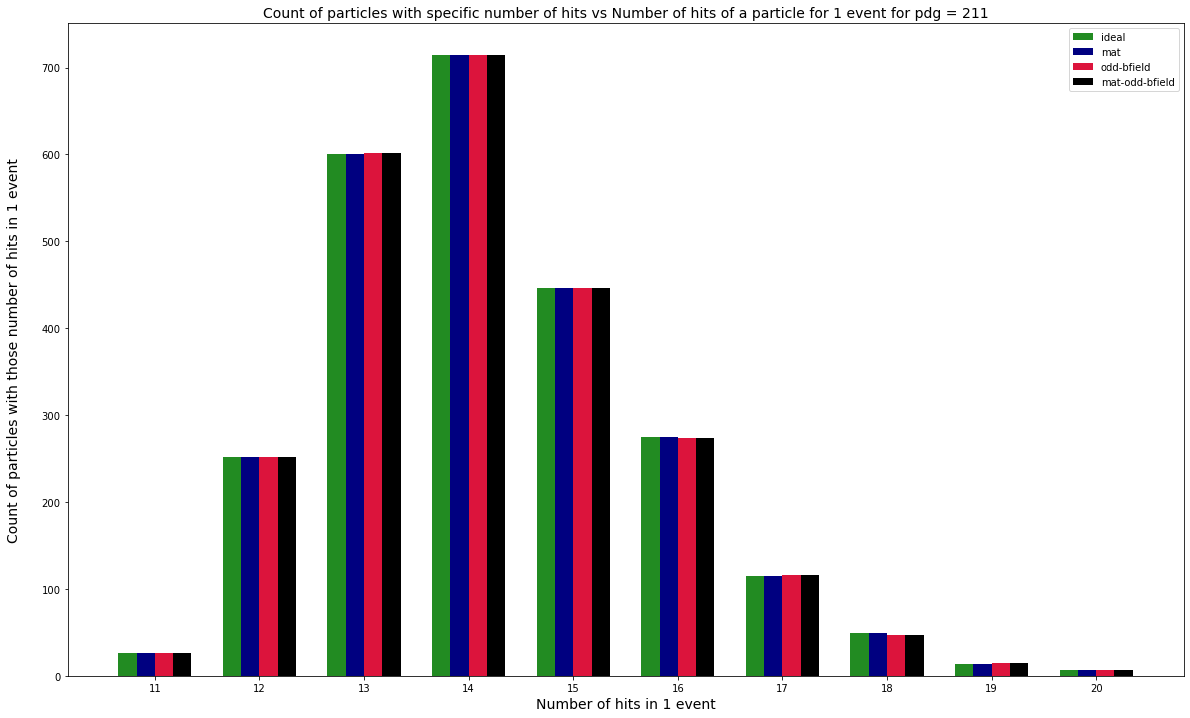

In [8]:
plot_counts_of_hits(pdg211_hits_per_simul, pdg211_count_min, pdg211_count_max, 211)